In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df=pd.read_csv(r"C:\Users\Rishabh Johri\Downloads\Outlier data.csv",index_col=0)

In [8]:
df.head()

,months_as_customer,age,policy_state,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
customer_id,,,,,,,,,,,,,,,,,,,,,
10001,328,48,OH,1406.91,0,466132,MALE,MD,craft-repair,sleeping,...,1,2,YES,71610,6510,13020,52080,Saab,92x,2004
10002,228,42,IN,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,...,0,0,?,5070,780,780,3510,Mercedes,E400,2007
10003,134,29,OH,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007
10004,256,41,IL,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014
10005,228,44,IL,1583.91,6000000,610706,MALE,Associate,sales,board-games,...,0,1,NO,6500,1300,650,4550,Accura,RSX,2009


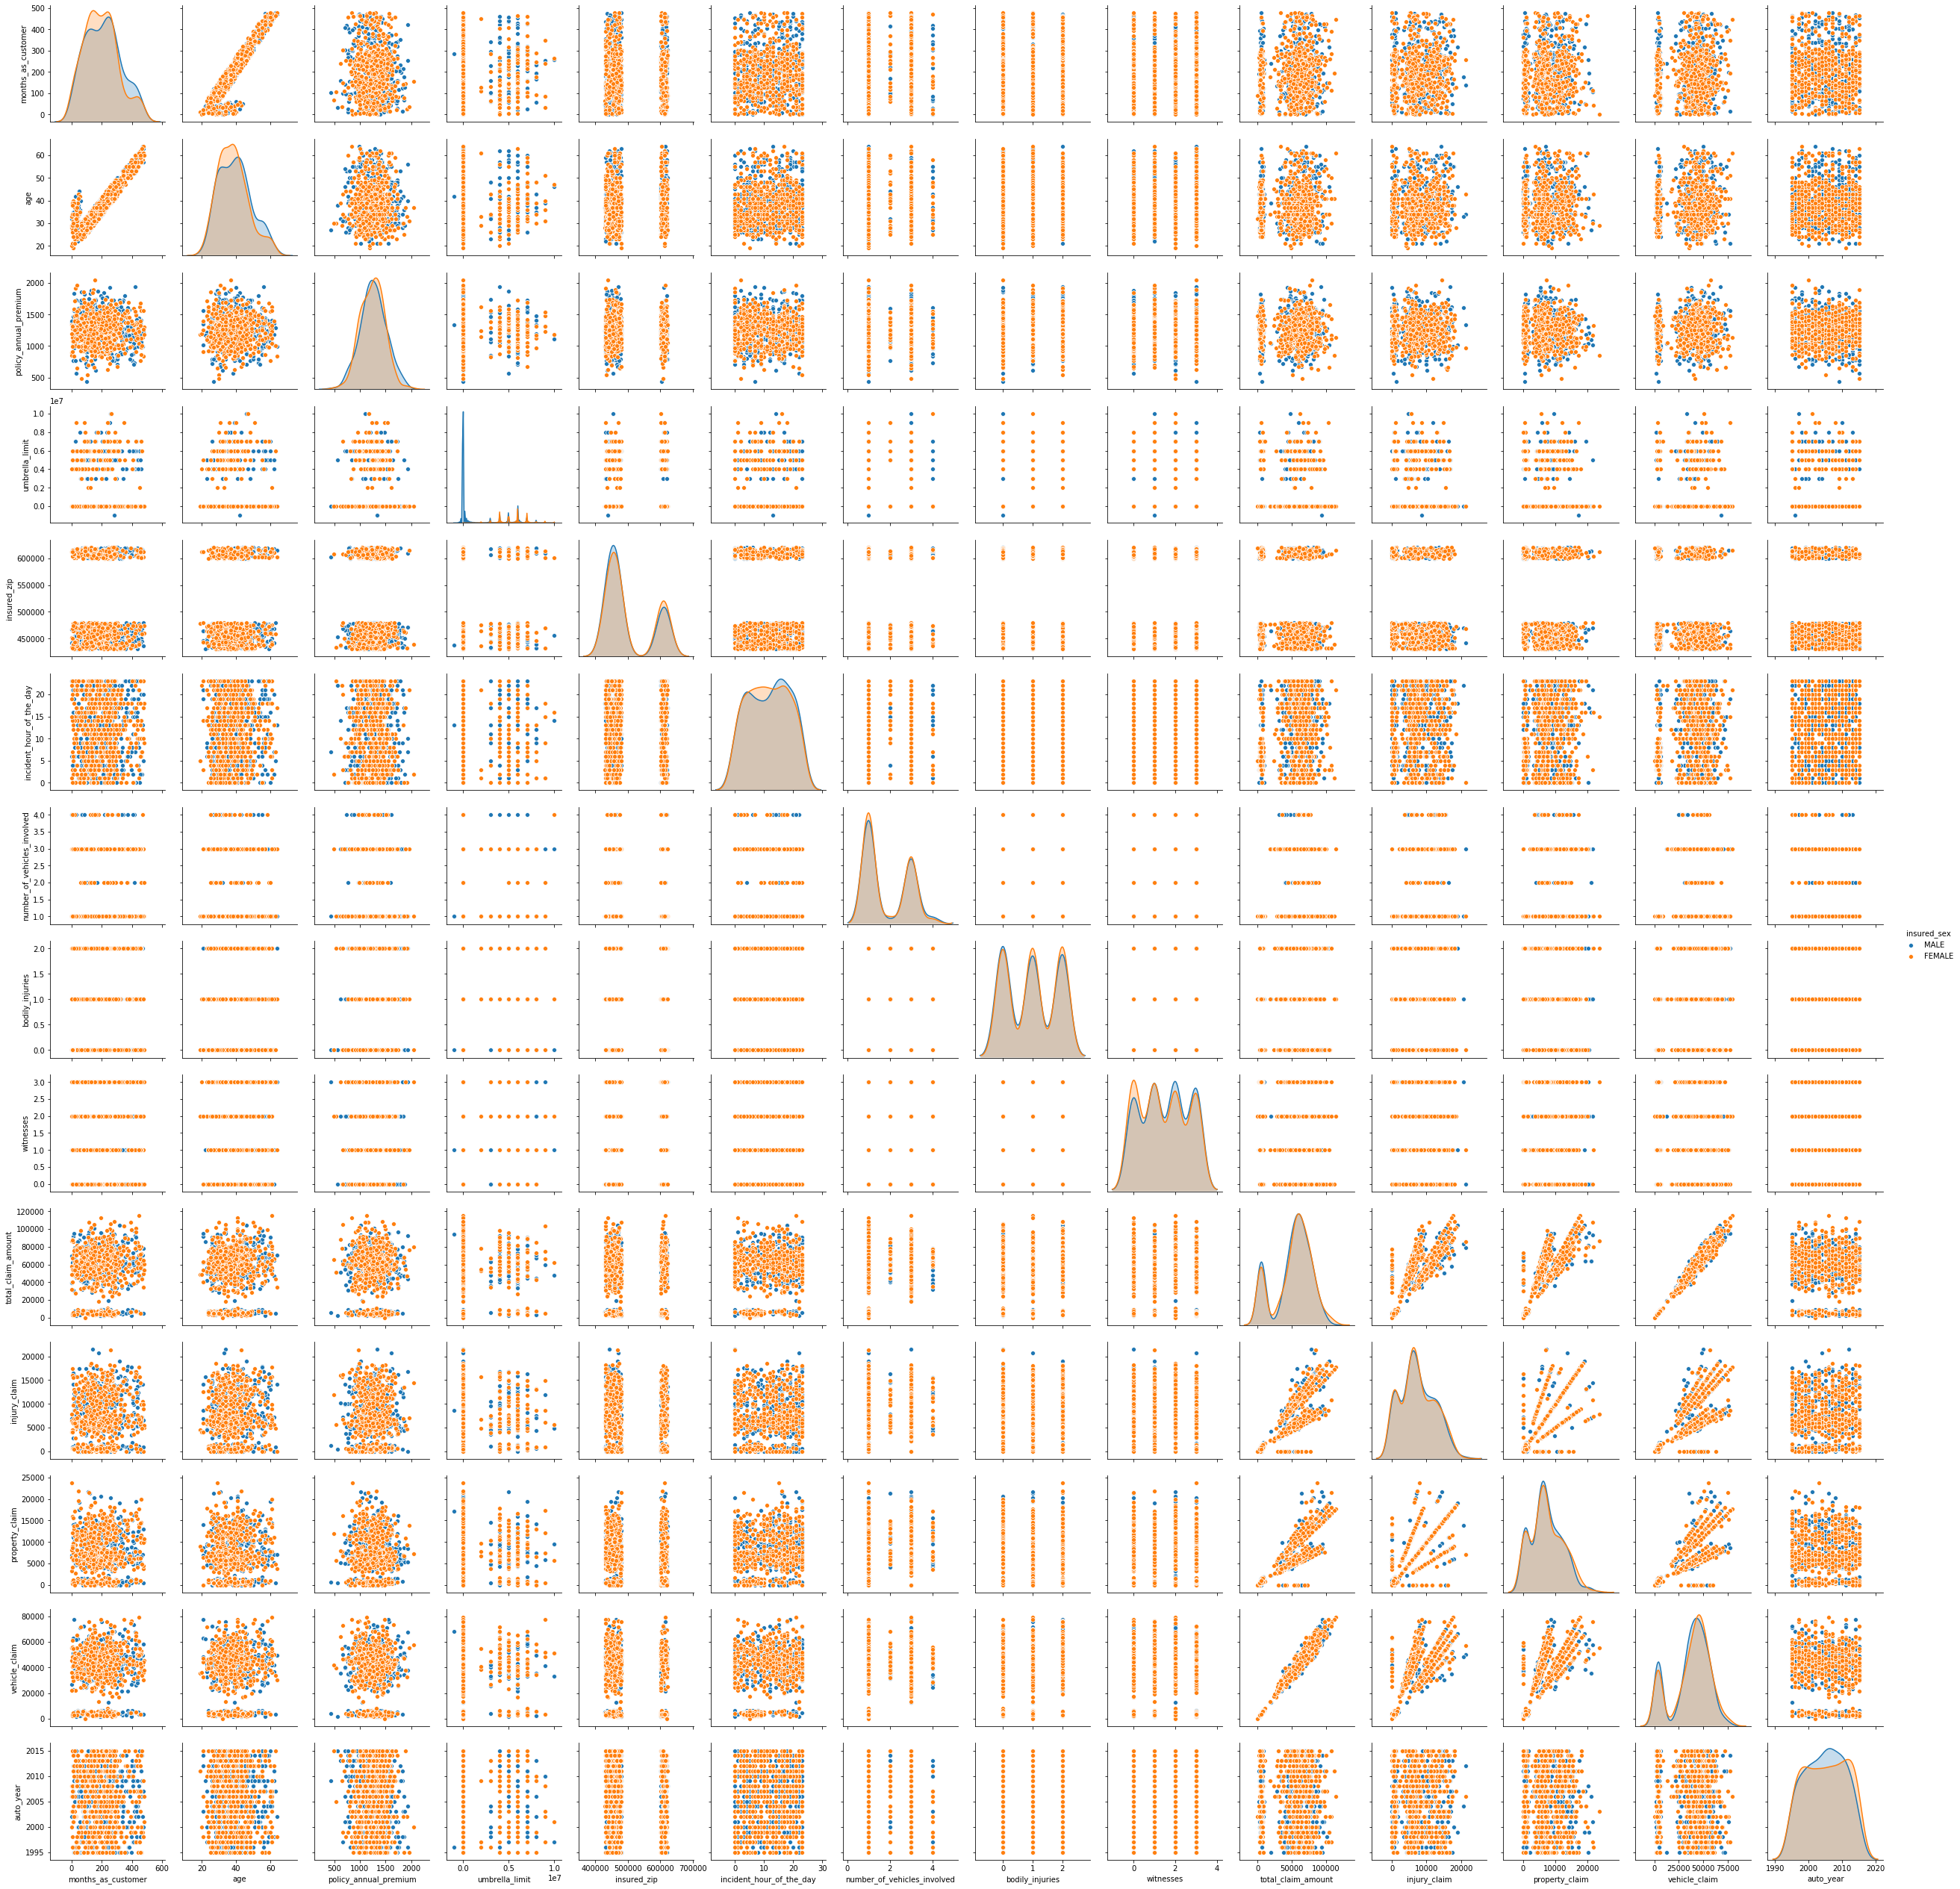

In [9]:
#visualising the data pairwise to get insight about data
sns.pairplot(df,hue='insured_sex')

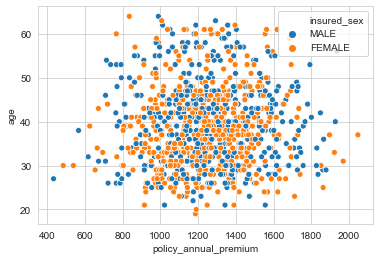

In [11]:
sns.set_style("whitegrid")
sns.scatterplot(data=df,x="policy_annual_premium", y="age",hue="insured_sex")

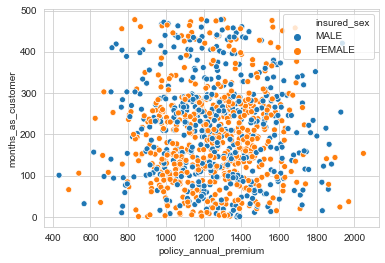

In [12]:
sns.set_style("whitegrid")
sns.scatterplot(data=df,x="policy_annual_premium", y="months_as_customer",hue="insured_sex")

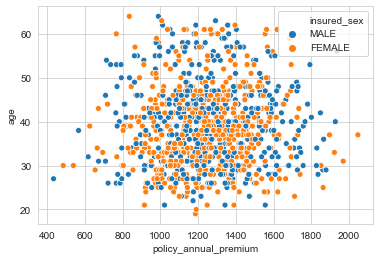

In [13]:
sns.set_style("whitegrid")
sns.scatterplot(data=df,x="policy_annual_premium", y="age",hue="insured_sex")

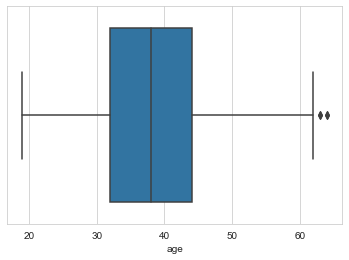

In [17]:
sns.boxplot(x=df['age'])

In [16]:
from sklearn.cluster import KMeans

In [40]:
k=KMeans(n_clusters=2)

In [41]:
df.drop("insured_sex",axis=1)

,months_as_customer,age,policy_state,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level,insured_occupation,insured_hobbies,incident_date,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
customer_id,,,,,,,,,,,,,,,,,,,,,
10001,328,48,OH,1406.91,0,466132,MD,craft-repair,sleeping,1/25/2015,...,1,2,YES,71610,6510,13020,52080,Saab,92x,2004
10002,228,42,IN,1197.22,5000000,468176,MD,machine-op-inspct,reading,1/21/2015,...,0,0,?,5070,780,780,3510,Mercedes,E400,2007
10003,134,29,OH,1413.14,5000000,430632,PhD,sales,board-games,2/22/2015,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007
10004,256,41,IL,1415.74,6000000,608117,PhD,armed-forces,board-games,1/10/2015,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014
10005,228,44,IL,1583.91,6000000,610706,Associate,sales,board-games,2/17/2015,...,0,1,NO,6500,1300,650,4550,Accura,RSX,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,3,38,OH,1310.80,0,431289,Masters,craft-repair,paintball,2/22/2015,...,0,1,?,87200,17440,8720,61040,Honda,Accord,2006
10997,285,41,IL,1436.79,0,608177,PhD,prof-specialty,sleeping,1/24/2015,...,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015
10998,130,34,OH,1383.49,3000000,442797,Masters,armed-forces,bungie-jumping,1/23/2015,...,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996


In [42]:
k.fit(df.drop(['policy_state', 'insured_sex','insured_education_level','insured_occupation','insured_hobbies','incident_date','police_report_available','auto_make','auto_model','property_damage','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location'], axis = 1)) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
k.cluster_centers_

array([[2.03836658e+02, 3.89600998e+01, 1.25678217e+03, 6.23441397e+03,
        5.00806638e+05, 1.16907731e+01, 1.85286783e+00, 9.72568579e-01,
        1.49251870e+00, 5.32649501e+04, 7.54200748e+03, 7.44299252e+03,
        3.82799501e+04, 2.00506733e+03],
       [2.04429293e+02, 3.88989899e+01, 1.25488308e+03, 5.53535354e+06,
        5.02866485e+05, 1.14545455e+01, 1.78282828e+00, 1.07070707e+00,
        1.46464646e+00, 5.07244949e+04, 6.99358586e+03, 7.22368687e+03,
        3.65072222e+04, 2.00524747e+03]])

In [45]:
# Here are aim is to find a relation between the gender and other parameters,ie. to check whether a gender bias exists or not.
def assign(c):
    if c=="MALE":
        return 1
    else:
        return 0

In [46]:
df["Cluster"]=df["insured_sex"].apply(assign)

In [47]:
df.head()

,months_as_customer,age,policy_state,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Cluster
customer_id,,,,,,,,,,,,,,,,,,,,,
10001,328,48,OH,1406.91,0,466132,MALE,MD,craft-repair,sleeping,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
10002,228,42,IN,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
10003,134,29,OH,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
10004,256,41,IL,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,0
10005,228,44,IL,1583.91,6000000,610706,MALE,Associate,sales,board-games,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,1


In [48]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(df['Cluster'],k.labels_))
print(classification_report(df['Cluster'],k.labels_))

[[435 102]
 [367  96]]
              precision    recall  f1-score   support

           0       0.54      0.81      0.65       537
           1       0.48      0.21      0.29       463

    accuracy                           0.53      1000
   macro avg       0.51      0.51      0.47      1000
weighted avg       0.52      0.53      0.48      1000



In [ ]:
#the final confusuion matrix :      435       102
#                                   367       96
# it denotes the number of false positives:102   and false negatives:367. These are the outliers.